In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# make sure you use Tesla K80 GPU (12GB), by changing 'runtmie type' 

!nvidia-smi


Wed Mar  4 13:34:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
#clone darknet repository 
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 12604 (delta 0), reused 0 (delta 0), pack-reused 12600
Receiving objects: 100% (12604/12604), 11.66 MiB | 11.16 MiB/s, done.
Resolving deltas: 100% (8560/8560), done.


In [4]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 

In [5]:
# go to the darknet folder, enable GPU, then compile the entire thing
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
In file included 

In [13]:
# get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!chmod a+x ./darknet


--2020-03-04 09:01:46--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  80.9KB/s    in 7m 10s  

2020-03-04 09:08:58 (80.5 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [7]:
!pwd

/content/darknet


In [6]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.5-4.2).
libvorbis-dev set to manually installed.
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
python3-numpy is already the newest version (1:1.13.3-2ubuntu1).
python3-numpy set to manually installed.
unzip is already the newest version (6.0-21ubuntu1).
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2017~U7-8).
libtbb-dev set to manually installed.
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.3).
libtiff5-dev set to manually installed.
qtbase5-dev is already the newest version (5.9.5+dfsg-0u

In [0]:
from google.colab import files

uploaded = files.upload()

Saving crick.mp4 to crick.mp4


In [0]:
!cp '/content/gdrive/My Drive/datasets/ball detection/imageslarge' '/content/darknet' -r

In [0]:
!cp '/content/gdrive/My Drive/datasets/ball detection/cricket.mp4' '/content/darknet' -r

In [0]:
  !pwd

/content/darknet


In [10]:
#output_video_name = "doggie.mp4"w 
#%cd ..
#!./darknet detector train cfg/balldetector-obj.data cfg/balldetector-yolov3.cfg yolov3.weights
!./darknet detector train cfg/obj.data cfg/yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000500, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.128530, iou_loss = 0.000000, total_loss = 0.128530 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000024, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.000004, iou_loss = 0.000000, total_loss = 0.000004 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000846, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.152734, iou_loss = 0.000000, total_loss = 0.152734 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000015, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
v3 (mse loss, Normalizer: (io

# New Section

In [11]:
!./darknet detector test cfg/obj.data cfg/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights imageslarge/frame4880.jpg

 CUDA-version: 10000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF


In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

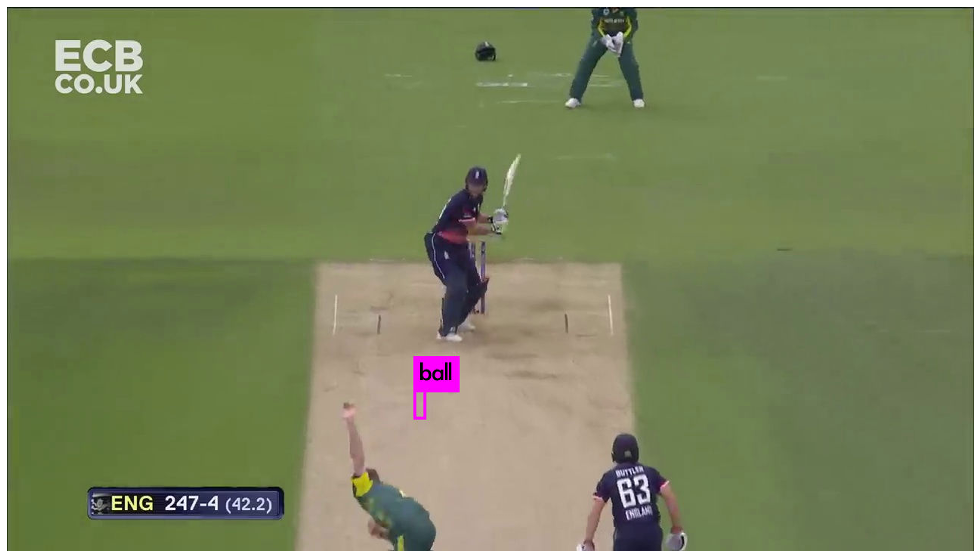

In [13]:
imShow('predictions.jpg')

In [15]:

!./darknet detector demo cfg/obj.data cfg/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show cricket.mp4 -i 0 -out_filename veout.avi


Streaming output truncated to the last 5000 lines.


FPS:64.2 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:64.1 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:63.3 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:61.9 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:61.5 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:61.3 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:61.3 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:61.3 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.5 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.7 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.5 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.5 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.2 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.2 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:59.9 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:59.8 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:59.7 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:59.9 	 AVG_FPS:71.1

 cvWriteFrame 
Objects:


FPS:60.0 	 AVG_FPS:67.6

 cvW

# New Section

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


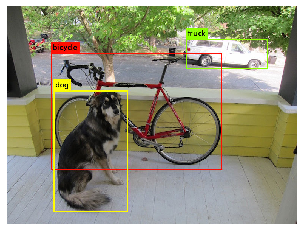

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [0]:
!rm /content/darknet/images

rm: cannot remove '/content/darknet/images': Is a directory


In [0]:
!rmdir /content/darknet/images


rmdir: failed to remove '/content/darknet/images': Directory not empty


In [0]:

!rm -rf /content/darknet/imagesnew